In [58]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil
import time

# Plot the (final) state of the LAST simulation

Text(0.5, 1.0, 't = 11010.0')

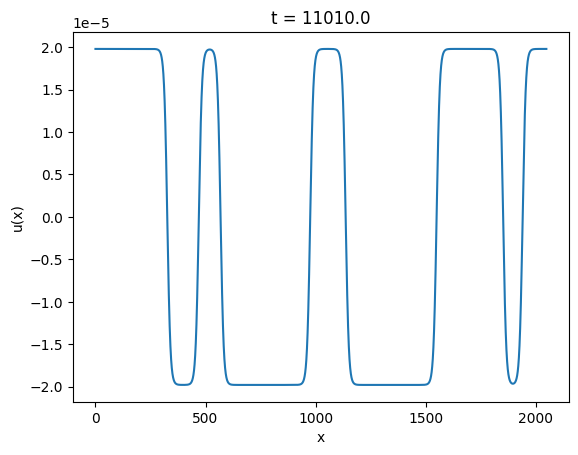

In [59]:
f = open("../tdgl_result.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        x[i-1] = float(a)
        y[i-1] = float(b)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
        tmax = float(tmax)
        N = int(N)
    i = i + 1

x = x[0:i-1]
y = y[0:i-1]

fig, ax = plt.subplots()
ax.plot(x,y,"-",ms="10",label="data")
ax.set_xlabel("x")
ax.set_ylabel("u(x)")
ax.set_title("t = "+str(tmax))

# Plot the modulus of the (1D) FFT $S(q)$

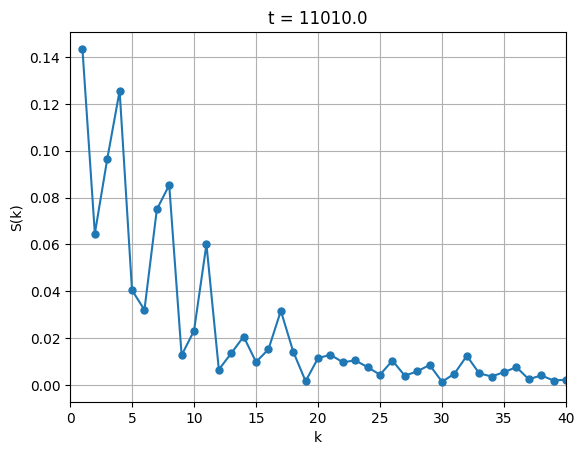

In [60]:
f = open("../fileSq.dat", "r")
q = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    if float(a) > 0:
        q[i] = float(a)
        y[i] = float(b)
        i = i + 1

q = q[0:i]
L = int(N)*float(dx)
k = q*(L/(2*np.pi))
y = y[0:i]

fig, ax = plt.subplots()
ax.plot(k,y,".-",ms="10",label="data")
ax.set_xlim(0,40)
ax.set_xlabel("k")
ax.set_ylabel("S(k)")
ax.set_title("t = "+str(tmax))
ax.grid()

In [61]:
x

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 2.0477e+03, 2.0478e+03,
       2.0479e+03])

### Plot the (initial) state
**NEED** to plot the final state before (because in _fileinit.dat_ only the u values are saved and not the x ones)

ValueError: x and y must have same first dimension, but have shapes (20480,) and (20481,)

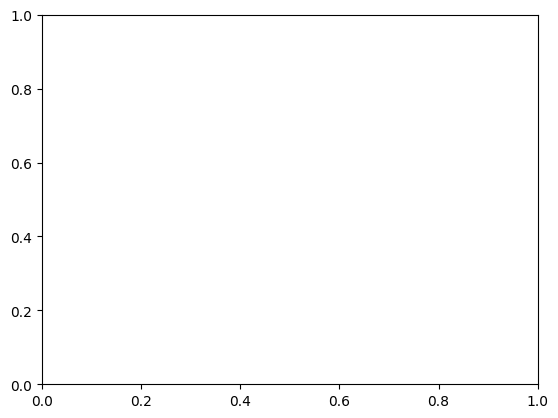

In [62]:
f = open("../fileinit.dat", "r")
N = 1000000000
yinit = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a = row
        yinit[i-1] = float(a)
    i = i + 1

yinit = yinit[0:i]

fig_init, ax_init = plt.subplots()
ax_init.plot(x,yinit,"-",ms="10",label="data")
ax_init.set_xlabel("x")
ax_init.set_ylabel("u(x)")
ax_init.set_title("Initial state")